首先导入一些必要的库
- cifar10: Keras库中包含的一个方便我们加载CIFAR-10数据集的类
- ImageDataGenerator: Keras中用于进行图像数据增强的类
- pyplot: Python中常用的画图工具matplotlib的画图类

In [1]:
# 如果没有安装 keras 和 tensorflow 库
# 请使用 pip install keras tensorflow 安装
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Using TensorFlow backend.


加载CIFAR-10数据集，并进行一些预处理。

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print("独热化后的输出形状")
print(y_train.shape)
print(y_test.shape)
print("处理前的最大值为%f" % x_train.max())
x_train = x_train / 255
x_test = x_test / 255
print("处理后的最大值为%f" % x_train.max())

170500096/170498071 [==============================] - 2s 0us/step
独热化后的输出形状
(50000, 10)
(10000, 10)
处理前的最大值为255.000000
处理后的最大值为1.000000


在ImageDataGenerator中定义图像数据增强的方式，这里我们采取了下列几种方式
- rotation_range=30，随机旋转不超过30度
- horizontal_flip=True, 随机进行水平翻转
- vertical_flip=True, 随机进行竖直反转
- width_shift_range=5, 随机进行不超过5像素的水平平移
- height_shift_range=5, 随机进行不超过5像素的竖直平移

In [3]:
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=5,
    height_shift_range=5
)

我们选取训练集中的一张卡车的图片，用这个ImageDataGenerator对图像进行五次随机变换并将它们画出来。

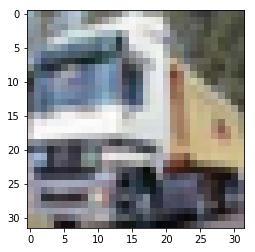

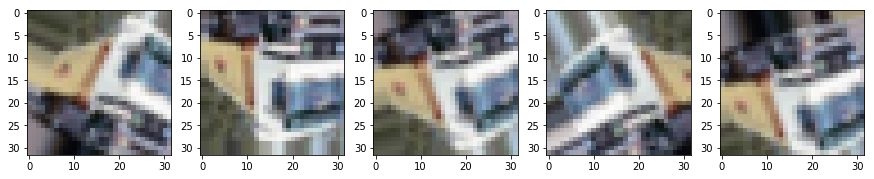

In [4]:
origin_image = x_train[1] # 选取原图
# 将原图画出来
plt.imshow(origin_image) 
plt.show()
# 对图像作五次随机变换并画出来
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
ax = ax.flatten()
for i in range(5):
    ax[i].imshow(datagen.random_transform(origin_image)) # 使用datagen对图像作随机变换
plt.show()

要使用增强后的数据代替原数据进行训练也非常简单，只需要更改一行代码。回想在上一节中，我们使用model.fit函数指定训练数据对模型进行训练。

```
model.fit(x_train, y_train, batch_size=32, epochs=10)
```

如果我们希望启用图像数据增强，Keras提供了fit_generator函数，用法如下。

```
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=10)
```

fit_generator接收的第一个参数是datagen.flow(x_train, y_train, batch_size=32)，这句话的意思是使用定义好的datagen对原始的输入数据进行变换，生成新的训练数据，每批次生成32个。其他的步骤没有变化，我们就可以像之前一样训练模型了。不要忘记在训练模型之前需要对数据进行预处理。

```
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train / 255
x_test = x_test / 255
```

除了上面提到的几种变换方式，Keras还提供了许多其他变换方式，另外还可以自己编写变换函数，对图片进行自定义的变化。